<h1 align="center">Similarity Based Recommendation System</h1> 
_______________________________________________________________________________________________________________________________

<h5 align="center">Luis Terán</h5> 

A recommendation engine is an information filtering system uploading information tailored to users' interests, preferences, or behavioral history on an item. It is able to predict a specific user's preference on an item based on their profile.
With the use of product recommendation systems, the customers are able to find the items they are looking for easily and quickly. A few recommendation systems have been developed so far to find products the user has watched, bought or somehow interacted with in the past.

The recommendation engine is a splendid marketing tool especially for e-commerce and is also useful for increasing profits, sales and revenues in general. That's why personalized product recommendations are so widely used in the retail industry, eleven more highlighting the importance of recommendation engines in the e-commerce industry.

<img src="images/recom2.jpeg" alt="Figure 1" style="width: 600px;"/><p style="text-align:center;font-size: 11px;">Recommendation system</p>

Recommendation systems use a number of different technologies. We can classify these systems into two broad groups:
- Content-based systems: Content-based systems examine properties of the items recommended. For instance, if a Netflix user has watched many cowboy movies, then recommend a movie classified in the database as having the “cowboy” genre.
- Collaborative filtering systems: Collaborative filtering systems recommend items based on similarity measures between users and/or items. The items recommended to a user are those preferred by similar users. 

The aim of this project is to create a similarity based recommendation system using collaborative filtering completely capable of make concrete recommendations of movies according to previous rated books movies the user. The original dataset was obtained from:

</br><center> https://grouplens.org/datasets/movielens/latest/ </center>

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data files used in this project were:

- Movies Data File Structure (movies.csv): Movie information is contained in the file `movies.csv`. Each line of this file after the header row represents one movie, and has the (movieId, title, genre) format.
- Ratings Data File Structure (ratings.csv): All ratings are contained in the file `ratings.csv`. Each line of this file after the header row represents one rating of one movie by one user, and has the (userId, movieId, rating, timestamp) format.

The process followed by the project was:
1. Exploratory Data Analysis: 
2. User Item Matrix
3. Similar User Search
4. Recommendation System Implementation
5. Final Evaluation

## 1. Exploratory Data Analysis

### 1.1 General Analysis

First of all, we need to import both datasets (movies & ratings) and take a view of the data. There are 9,742 movies with id, title and genres, also 100,836 ratings of those movies. Before proceeding, we need to take care of some aspects of the dataset:

- Missing values: There were found 0 missing in any of the datasets.
- Duplicates: There were no duplicate observations in any dataset.
- Unnecessary variables: Since the recommender system is based only in previous evaluations, is only necessary to know the evaluation, which movie was evaluated and who made the evaluation ('rating', 'movieId', 'userId').

In [25]:
# All the libraries needed for the project are loaded
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import warnings

np.random.seed(0)
warnings.filterwarnings('ignore')

In [26]:
# Importing movie dataset
movies = pd.read_csv("./data/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [27]:
# Showing number of rows (9742) and columns (3) of the movies dataset
movies.shape

(9742, 3)

In [28]:
# Looking for null values
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 152.3+ KB


In [29]:
# Importing rating dataset
ratings = pd.read_csv("./data/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [30]:
# Showing number of rows (100836) and columns (4) of the movies dataset
ratings.shape

(100836, 4)

In [31]:
# Looking for null values
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [32]:
# Looking for duplicated values
ratings.duplicated().sum()

0

### 1.2 Distribution of the ratings dataset

We'll start by understanding what are the most frequent rating evaluations in the ratings dataset and how are they distributed. The evaluation consists of 10 possible values between 0.5 and 5 (0.5 step increasing). We can see that 75% of the reviews are equal or greater than 3 and 50% is greater or equal to 4 stars. The low ratings are not frequent in the dataset and a 4 star rating is the most frequent evaluation.

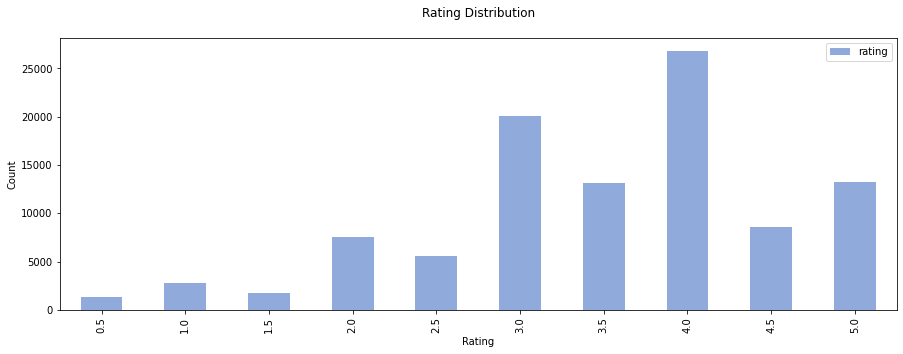

In [33]:
(pd.DataFrame(ratings['rating']
              .value_counts(sort=False))
              .sort_index()
              .plot(kind='bar', color='#4472C4', figsize=(15,5), alpha=0.6))
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [34]:
ratings['rating'].describe().to_frame()

,rating
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


Now, let's count how those reviews are distributed among the users. We find out that the numbers of ratings by user ranges between 2 and 791, but almost the 75% of the users has only reviewed less than 100 movies.

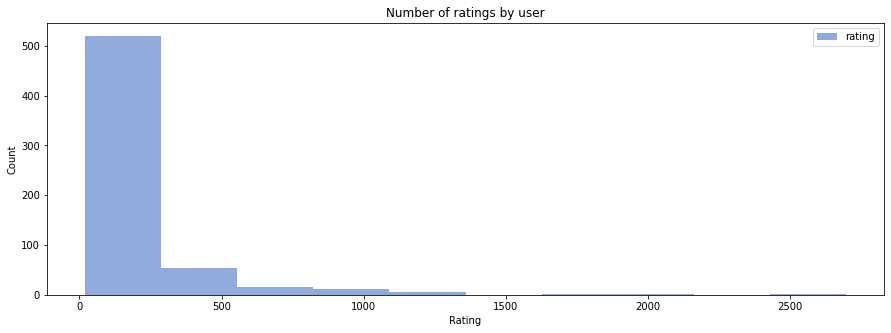

In [35]:
(pd.DataFrame(ratings.groupby('userId')
              .count()['rating'])
              .plot(kind='hist', color='#4472C4', figsize=(15,5), alpha=0.6))
plt.title('Number of ratings by user')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [36]:
pd.DataFrame(ratings.groupby('userId').count()['rating']).describe()

,rating
count,610.000000
mean,165.304918
std,269.480584
min,20.000000
25%,35.000000
50%,70.500000
75%,168.000000
max,2698.000000


One important aspect of the recommendation system is what makes a movie recommendable. One movie could have an average 5 star rating with only two reviews but that doesn't make that movie the most recommendable movie. For that reason, we'll define a threshold, the threshold will the minimum number of reviews for a movie to be considered as a reliable recommendations. We will drop movies below the threshold value so only popular movies are recommend, we don't have an explicit measure of how popular a movie but we can obtain how many reviews have received every movie. 

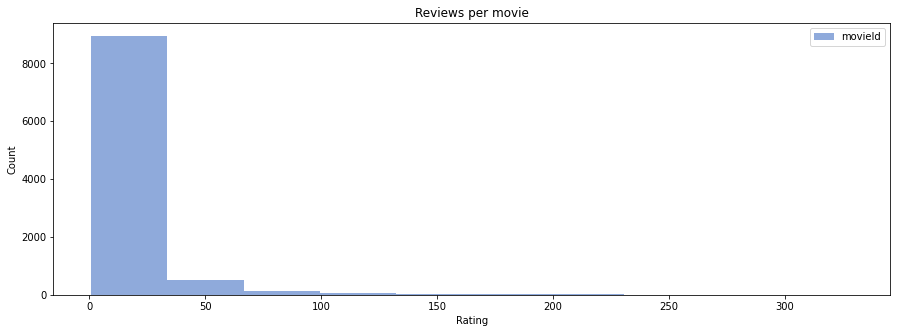

In [37]:
# Reviews per movie plot
ratesMovies = pd.DataFrame(ratings['movieId'].value_counts(sort=False))
ratesMovies.plot(kind='hist', color='#4472C4', figsize=(15,5), alpha=0.6)
plt.title('Reviews per movie')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

As a first view, we realize that most of the movies don't have more than 30 reviews but there is no clear value to select as threshold.

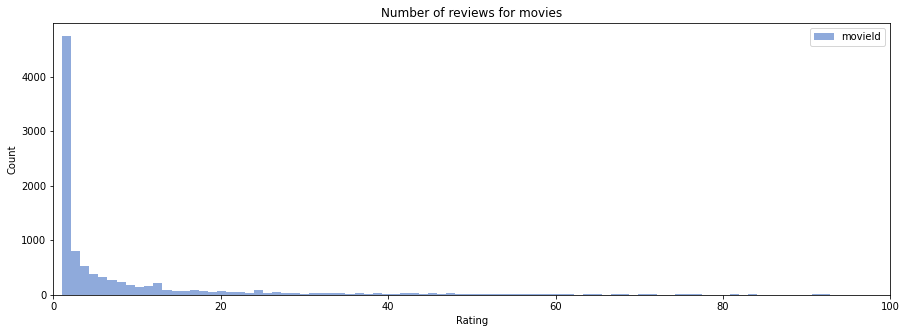

In [38]:
# Reviews per movie plot between 0 and 100
ratesMovies.plot.hist(xlim=(0,100), bins=300, color='#4472C4', figsize=(15,5), alpha=0.6)
plt.title('Number of reviews for movies')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Taking a closer look we see that most of the movies have less than 30 reviews and after this value the frequency remains constant so this value we will be used as the threshold. Then, we need to remove all those reviews that belong to not popular movies. From the 100,836 initial reviews only 57,358 remained.

In [39]:
# The threshold is defined
threshold = 30

In [40]:
# Ratings before removing the less popular movies
len(ratings)

100836

In [41]:
# Removing less popular movies
ratesMovies.reset_index(inplace=True)
ratesMovies.columns=['movieId', 'reviews']
ratings = pd.merge(ratings, ratesMovies, on='movieId', how="left").copy()
ratings = ratings[ratings['reviews']>threshold].copy()

In [42]:
# Ratings after removing the less popular movies
len(ratings)

57358

In [43]:
# We will also remove not popular movies from the movies dataset
remaining_movies = list(ratings.movieId.values)
movies = movies[movies['movieId'].isin(remaining_movies)].copy()

### 1.3 Distribution of the ratings dataset

As we already told, for the system the movie information and how the users have interacted determines how the movies are recommended. This means that the movies and their characteristics are not as important as the ones in the ratings dataset. Nevertheless, we'll take a quick view of the characteristics in the dataset in order to have a full picture of the data we are handling. 
Some extra information can be obtained by extracting the year of release for the movies. From that we can conclude that the majority of the movies in the dataset were released near the year 2000.

In [44]:
# Extracting the year out of the title column
movies['year'] = movies['title'].str.extract(r"\((\d+)\)", expand=False)
movies['year'] = pd.to_numeric(movies['year'])
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
5,6,Heat (1995),Action|Crime|Thriller,1995


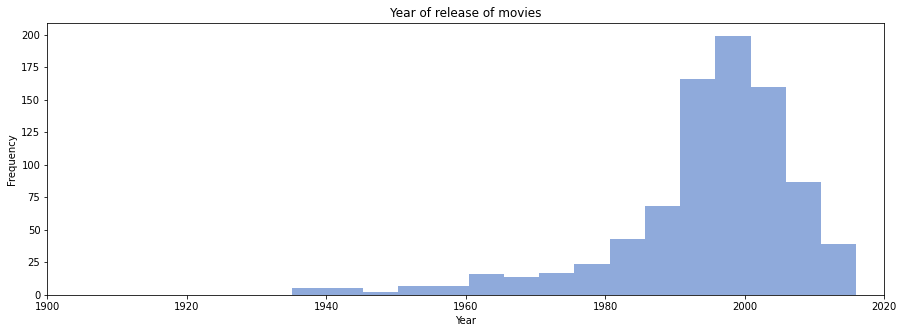

In [45]:
# Year of release histogram
movies['year'].plot(kind = 'hist', xlim=(1900,2020), bins=300, color='#4472C4', figsize=(15,5), alpha=0.6)
plt.title('Year of release of movies')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

Another important characteristic parameter is the movie genre. More than one movie genre can appear for movie description so we will count the number of total occurrences of elements in the Genre column. The most frequent genres are Drama and Comedy, being approximately 4 times more frequent than Fantasy or Horror movies.

In [46]:
# Genre frequency list
genres = list(movies.genres.values)
movie_genres = [movie.split('|') for movie in genres]
movie_genres = [x for sublist in movie_genres for x in sublist]
genres_freq = pd.DataFrame(pd.Series(movie_genres, name='Genre movies').value_counts().head(10))
genres_freq.reset_index(inplace=True)
genres_freq

,index,Genre movies
0,Drama,355
1,Comedy,345
2,Action,292
3,Thriller,242
4,Adventure,236
5,Sci-Fi,161
6,Romance,159
7,Crime,150
8,Fantasy,120
9,Children,82


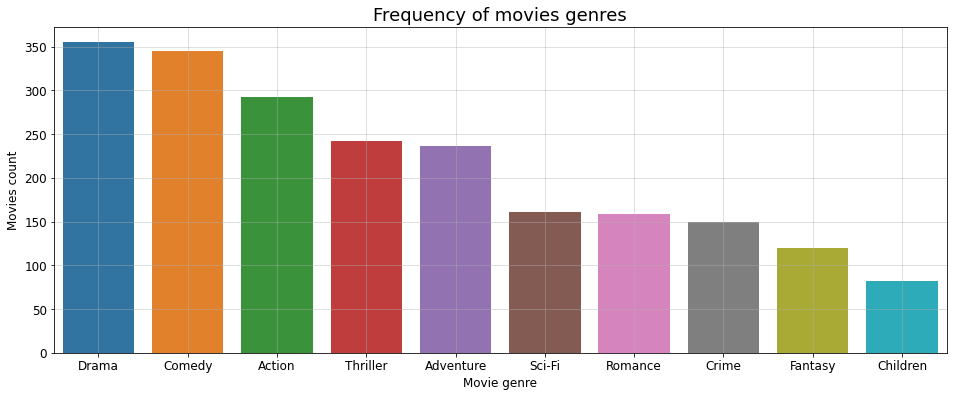

In [47]:
# Genre frequency barplot
fig = plt.figure(figsize=(16,6))
ax = sns.barplot(x="index", y="Genre movies", data=genres_freq)
plt.title('Frequency of movies genres', size=18)
plt.xticks(size=12)
plt.xlabel('Movie genre', size=12)
plt.yticks(size=12)
plt.ylabel('Movies count', size=12)
plt.grid(alpha=0.5)
plt.show()

### 1.4 Top movies

Finally, since this is a real users dataset, just for fun we can see what are the best rated popular movies and what are worst rated popular movies. One interesting fact is that Drama genre is frequent in the top rated movies, also Crime movies, even though there are not frequent, are really well rated. On the other hand, action and comedy movies are frequent genres in the worst rated movies.

In [48]:
# Obtaining mean rating for every movie
sorted_movies = ratings.groupby('movieId').mean()
sorted_movies.sort_values(['rating', 'reviews'], ascending=[False, False], inplace = True)
top10movies = list(sorted_movies.head(10).index)
bottom10movies = list(sorted_movies.tail(10).index)

In [49]:
# Top rated movies
movies[movies['movieId'].isin(top10movies)]

,movieId,title,genres,year
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,1994
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,1964
659,858,"Godfather, The (1972)",Crime|Drama,1972
686,904,Rear Window (1954),Mystery|Thriller,1954
906,1204,Lawrence of Arabia (1962),Adventure|Drama|War,1962
914,1213,Goodfellas (1990),Crime|Drama,1990
922,1221,"Godfather: Part II, The (1974)",Crime|Drama,1974
975,1276,Cool Hand Luke (1967),Drama,1967
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,1999
6315,48516,"Departed, The (2006)",Crime|Drama|Thriller,2006


In [50]:
# Worst rated movies
movies[movies['movieId'].isin(bottom10movies)]

,movieId,title,genres,year
163,193,Showgirls (1995),Drama,1995
313,355,"Flintstones, The (1994)",Children|Comedy|Fantasy,1994
379,435,Coneheads (1993),Comedy|Sci-Fi,1993
396,455,Free Willy (1993),Adventure|Children|Drama,1993
607,762,Striptease (1996),Comedy|Crime,1996
1174,1562,Batman & Robin (1997),Action|Adventure|Fantasy|Thriller,1997
1235,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,1997
1373,1882,Godzilla (1998),Action|Sci-Fi|Thriller,1998
2029,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,1999
2860,3826,Hollow Man (2000),Horror|Sci-Fi|Thriller,2000


## 2. User Item Matrix

After that, we need to create the User Item Matrix, this is a matrix with all the movies in the dataset as columns and all the users as rows, so every element inside the matrix represents what is the evaluation a user has made for a particular movie. In the matrix, a column (specific movie) will contain all the evaluations the users have made for that movie meanwhile every row will contain all the ratings made from the same user.

<img src="images/uim.png" alt="Figure 1" style="width: 500px;"/><p style="text-align:center;font-size: 11px;">User Item Matrix</p>

For that, we start by selecting only the useful information from the ratings dataset ('userId', 'movieId', 'rating') and then use a pivot table to define users as rows, movies as columns and the ratings as values of the matrix. Due to the unseen movies, lots of the values will be presented as 'NaN', these 'NaN' values will be replaced by 0 to represent unseen movies since the scale of evaluation minimum value is 0.5.

In [51]:
# Getting only significant columns for the UIM matrix
uim = ratings[['userId', 'movieId', 'rating']].copy()
uim.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [52]:
# Creating UIM matrix using pivot
uim = uim.pivot(index='userId', columns='movieId', values='rating')
uim.head()

movieId,1,2,3,5,6,7,10,11,16,17,...,115617,116797,119145,122882,122886,122904,134130,134853,139385,152081
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Filling NA's with 0
uim = uim.fillna(0)
uim.head()

movieId,1,2,3,5,6,7,10,11,16,17,...,115617,116797,119145,122882,122886,122904,134130,134853,139385,152081
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Similar User Search

Once we have represented as rows all the reviews made by a particular user we need a way to compare the similarity between a new user and the users from the dataset, for this we will implement Cosine Similarity method.

Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. A vector can represent  thousands of attributes, in this case every attribute is the evaluation of a particular movie. Thus, each group of ratings is an object represented by what is called a term-frequency vector, this is every singular row in our User Item Matrix.

<img src="images/cos.png" alt="Figure 1" style="width: 500px;"/><p style="text-align:center;font-size: 11px;">Cosine similarity</p>

The cosine between two vectors (theta) can be also defined as the dot product divided by the module of them. Additionally, the resulting value will change according to the angle between them, as we can see from the picture when the angle is zero the two vectors are overlapping, thus they are really similar. However, when the angle is really open means the vectors are completely different from each other. When we compute the cosine of the angle it gives us values between 0 and 1. 
- As the values of cosine similarity gets closer to 1 (angle = 0°), the more similar the vectors.
- As the values of cosine similarity gets closer to 0 (angle = 90°), the less similar the vectors.

Considering this, we will create a function that iteratively will calculate the similarity from all the users present in the UIM matrix. Then, the function will return a list of the similar users and their respective cosine similarity, these similar users and similarities will be sorted by how similar they are to the studied user. 

We tested the function with the first user of our dataset, as we expected the greatest similarity is with himself. But also is similar with users 597, 366, 311 & 417.

In [54]:
from sklearn.metrics.pairwise import cosine_similarity

# Function for finding similar users
# Receives:
# - user: The ratings made by the user to study
# - uim: The User Item Matrix with all other users to calculate similarity
def findSimilarUsers(user, uim):
    similarity = []
    for i,row in enumerate(uim.values):
        cos = cosine_similarity(user, row.reshape(1, -1))[0][0]
        similarity.append([i, cos])
    temp = pd.DataFrame(similarity, columns=['userId', 'similarity'])
    temp = temp.sort_values(by=['similarity'], ascending=False).copy()
    similar_users = list(temp['userId'].values)
    similarities = list(temp['similarity'].values)

    return (similar_users, similarities)

In [55]:
# Test user is created by selecting the first user of the UIM matrix
user = uim.iloc[0].values.reshape(1, -1)
temp = findSimilarUsers(user, uim)

In [56]:
# The top 5 similar users are:
temp[0][0:5]

[0, 597, 366, 311, 467]

In [57]:
# The cosine similarity obtained respectively for that users are:
temp[1][0:5]

[0.9999999999999998,
 0.4855035808289292,
 0.4784148761010285,
 0.4756257951946654,
 0.4717509600003482]

## 4. Recommendation System Implementation

Now we have similar users to recommend movies but how can we select which movies to recommend? Well, for that problem we decided to create weight selection.

After we know which users are similar to the studied user, we first verify what movies has the user seen and remove them from the evaluations of the similar users in order to avoid recommending movies that the studied user has already seen.

<img src="images/imp1.png" alt="Figure 1" style="width: 800px;"/><p style="text-align:center;font-size: 11px;"><p style="text-align:center;font-size: 11px;">Selecting unseen movies</p>   
</br> 

From the remaining movies, we'll keep only those movies that similar users liked hence had given a high rate for the movies previously selected. Therefore, before doing this we need to define a value in order to select if a value will be removed or not, for the images presented a threshold of 4 was selected but for the actual project the defined threshold was 5. This will result in a matrix of movies that the studied user hasn't watched classified into the ones that probably would like (1) and the ones that would not (0).
   
<img src="images/imp2.png" alt="Figure 1" style="width: 400px;"/><p style="text-align:center;font-size: 11px;"><p style="text-align:center;font-size: 11px;">Filtering movies according to the rating</p>

<img src="images/imp3.png" alt="Figure 1" style="width: 400px;"/><p style="text-align:center;font-size: 11px;"><p style="text-align:center;font-size: 11px;">Classified matrix</p>

Next, we can use the calculated cosine similarity for every user as the weight of their recommendations, the possible movie recommendations (rows of the matrix) are multiplied by the cosine similarity values previously calculated, this value is different for every user.  
<img src="images/imp4.png" alt="Figure 1" style="width: 600px;"/><p style="text-align:center;font-size: 11px;"><p style="text-align:center;font-size: 11px;">Cosine similarity</p>

<img src="images/imp5.png" alt="Figure 1" style="width: 600px;"/><p style="text-align:center;font-size: 11px;"><p style="text-align:center;font-size: 11px;">Cosine similarity multiplied</p>

Finally, the final score of recommendation for every movie is obtained by the sum of the the individual scores of every user for that movie (1.6 for the image above), in other words, since every column of the matrix represents a singular movie, the sum of values for that column gives us the final score. This way, we are taking into consideration how many times a movie is well rated by a similar user, if similar users have evaluated the same movie with high ratings it will result in a highly recommendable movie. The importance (weigth) that is given for the opinion of every user is given by the similarity to the studied user.

**This is a simplification of the process for understanding purposes, the actual system implementation may change in some details. Nevertheless, the main idea is shown above.**

In [58]:
# Function that returns the most suitable recommendations of movies
# Requires:
# - user: The ratings made by the user to study
# - uim: The User Item Matrix with all other users to calculate similarity
# - recommendations: Number of expected recommendations
# - analyzed_users: Number of similar users to analyze
# - findSimilarUsers: Function that finds similar users from the dataset

def findSimilarMovies(user, uim, recommendations=10, analyzed_users=10):
    # Looking for movies that the user has already seen
    seen = list(uim.columns[list((user>0)[0])])
    
    # Looking for similar users
    similars = findSimilarUsers(user, uim)
    
    # The Dataframe of results is ceated
    scores = pd.DataFrame(columns=['movieId', 'score'])
    dtypes = np.dtype([
          ('movieId', int),          
          ('score', float),          
          ])

    # For the top similar users (analyzed users) the process gets repeated
    for sim_user, sim_score in zip(similars[0][0:analyzed_users], similars[1][0:analyzed_users]):
        # Dropping movies that the studied user has already seen
        rec_movies = uim.iloc[sim_user].drop(seen)
        # Dropping low rated movies
        rec_index = list(rec_movies[rec_movies>4].index.values)        
        
        if (len(rec_index)>0):
            # For every recommended movies of a particualar similar user:
            for movie in rec_index:
                # If the movie is not in the dataframe, it will add it to the dataframe
                if (movie not in scores['movieId'].values):
                    scores.loc[len(scores)] = (movie, 10*sim_score)
                else: 
                # If the movies is already in the dataframe , it will increase its score
                    scores.loc[scores['movieId']==movie, 'score'] += 10*sim_score
        # The values are sorted by the score obtained
        scores.sort_values(by='score', ascending=False, inplace=True)
        
        # There could the case that not enough users are similar
        try:
            scores = scores.head(recommendations)
            scores['movieId'] = scores['movieId'].astype(int)
        except:
            scores['movieId'] = scores['movieId'].astype(int)
    
    # The movie id's and their corresponding scores are returned in lists
    return (list(scores.movieId.values), list(scores.score.values))   

In [59]:
# movie Id and Score obtained for that recommendation
ids, scores = findSimilarMovies(user, uim)    
pd.DataFrame({'movieId': ids, 'Score': scores})

,movieId,Score
0,293,14.059126
1,4226,9.519094
2,4973,9.377341
3,112,4.855036
4,6874,4.855036
5,6711,4.855036
6,5669,4.855036
7,4848,4.855036
8,3949,4.855036
9,52973,4.522305


In [60]:
# Looking for what movies belong to those movie ids
movies[movies['movieId'].isin(ids)]

,movieId,title,genres,year
99,112,Rumble in the Bronx (Hont faan kui) (1995),Action|Adventure|Comedy|Crime,1995
254,293,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,1994
2945,3949,Requiem for a Dream (2000),Drama,2000
3141,4226,Memento (2000),Mystery|Thriller,2000
3544,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller,2001
3622,4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,2001
4012,5669,Bowling for Columbine (2002),Documentary,2002
4529,6711,Lost in Translation (2003),Comedy|Drama|Romance,2003
4615,6874,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller,2003
6481,52973,Knocked Up (2007),Comedy|Drama|Romance,2007


## 5. Final Evaluation

Finally we've got a movie recommendation system, now we can make predictions of possible recommendations but we still we don't know if the predictions are made correctly. It's hard to really evaluate whether the system is predicting the right movies or not. The best way to evaluate is to make predictions with real users and see of the movies are correctly predicted, or split the data reducing the UIM matrix, cutting some movies the users has liked. A simpler way is by random gender selection, since the movies predicted are not content based, the prediction system never considers the gender of the movie (ratings dataset), so if we create a user that only likes movies that belong to the same genre, we estimate that the predictions made belong to that genre too.

<img src="images/recom.jpg" alt="Figure 1" style="width: 500px;"/><p style="text-align:center;font-size: 11px;">Recommendation system</p>

For this part of the project we'll make this prediction for two genres:
- Comedy movies
- Horror movies
For the creation of the movies, 10 random movies were selected that contain the genre "Comedy"/"Horror" in the movie genre description. Another important fact, is that as the user rates more movies, the higher the recommendation score could be, this is, as the user evaluates more movies the system creates better recommendations, for the cases presented we've only used 10 ratings.
As we expected, the general view states that most of the movies belong to the same genre the user liked or related. Nevertheless, there are some different genres in the recommendations this is because some movies don't have a unique genre, there are some movies that ave multiple genres. But, in a general way, we can see that for most of the predictions, the recommendations are related and are from the same kind.


### 5.1 User that only likes comedy movies

In [82]:
comedy_movies = movies[movies['genres'].str.contains('Comedy', regex=False)].copy()
comedy_movies = comedy_movies.sample(10).copy()
comedy_movies

,movieId,title,genres,year
99,112,Rumble in the Bronx (Hont faan kui) (1995),Action|Adventure|Comedy|Crime,1995
1727,2321,Pleasantville (1998),Comedy|Drama|Fantasy,1998
1603,2145,Pretty in Pink (1986),Comedy|Drama|Romance,1986
820,1080,Monty Python's Life of Brian (1979),Comedy,1979
3568,4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,2001
8636,119145,Kingsman: The Secret Service (2015),Action|Adventure|Comedy|Crime,2015
383,440,Dave (1993),Comedy|Romance,1993
6016,38061,Kiss Kiss Bang Bang (2005),Comedy|Crime|Mystery|Thriller,2005
1005,1307,When Harry Met Sally... (1989),Comedy|Romance,1989
5938,34162,Wedding Crashers (2005),Comedy|Romance,2005


In [83]:
user1 = []
for col in uim.columns:   
    user1.append(5) if (col in list(comedy_movies['movieId'].values))  else user1.append(0)      
user1 = np.array(user1).reshape(1,-1)

In [84]:
print ('User 1 has {} rated movies and {} unseen movies'.format(len(user1[user1==5]), len(user1[user1==0])))

User 1 has 10 rated movies and 850 unseen movies


In [85]:
ids, scores = findSimilarMovies(user1, uim)  
sc = pd.DataFrame({'movieId': ids, 'Score': scores}).copy()
recs = movies[movies['movieId'].isin(ids)].copy()
pd.merge(sc, recs).sort_values('Score', ascending=False)

,movieId,Score,title,genres,year
0,1,5.089188,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,356,3.815754,Forrest Gump (1994),Comedy|Drama|Romance|War,1994
2,6942,2.687132,Love Actually (2003),Comedy|Drama|Romance,2003
3,7451,2.687132,Mean Girls (2004),Comedy,2004
4,1215,2.652919,Army of Darkness (1993),Action|Adventure|Comedy|Fantasy|Horror,1993
5,8641,2.652000,Anchorman: The Legend of Ron Burgundy (2004),Comedy,2004
6,6188,2.652000,Old School (2003),Comedy,2003
7,88163,1.525983,"Crazy, Stupid, Love. (2011)",Comedy|Drama|Romance,2011
8,1265,1.525983,Groundhog Day (1993),Comedy|Fantasy|Romance,1993
9,1258,1.503717,"Shining, The (1980)",Horror,1980


### 5.2 User that only like horror movies

In [265]:
horror_movies = movies[movies['genres'].str.contains('Horror', regex=False)].copy()
horror_movies = horror_movies.sample(10).copy()
horror_movies

,movieId,title,genres,year
2078,2762,"Sixth Sense, The (1999)",Drama|Horror|Mystery,1999.0
6630,56174,I Am Legend (2007),Action|Horror|Sci-Fi|Thriller|IMAX,2007.0
2641,3535,American Psycho (2000),Crime|Horror|Mystery|Thriller,2000.0
920,1219,Psycho (1960),Crime|Horror,1960.0
5335,8874,Shaun of the Dead (2004),Comedy|Horror,2004.0
1997,2657,"Rocky Horror Picture Show, The (1975)",Comedy|Horror|Musical|Sci-Fi,1975.0
915,1214,Alien (1979),Horror|Sci-Fi,1979.0
1083,1407,Scream (1996),Comedy|Horror|Mystery|Thriller,1996.0
957,1258,"Shining, The (1980)",Horror,1980.0
2027,2699,Arachnophobia (1990),Comedy|Horror,1990.0


In [266]:
user2 = []
for col in uim.columns:   
    user2.append(5) if (col in list(horror_movies['movieId'].values))  else user2.append(0)      
user2 = np.array(user2).reshape(1,-1)

In [267]:
print ('User 2 has {} rated movies and {} unseen movies'.format(len(user2[user2==5]), len(user2[user2==0])))

User 2 has 10 rated movies and 426 unseen movies


In [268]:
ids, scores = findSimilarMovies(user2, uim)  
sc = pd.DataFrame({'movieId': ids, 'Score': scores}).copy()
recs = movies[movies['movieId'].isin(ids)].copy()
pd.merge(sc, recs).sort_values('Score', ascending=False)

,movieId,Score,title,genres,year
0,1387,9.695435,Jaws (1975),Action|Horror,1975.0
1,253,9.543883,Interview with the Vampire: The Vampire Chroni...,Drama|Horror,1994.0
2,1215,7.747767,Army of Darkness (1993),Action|Adventure|Comedy|Fantasy|Horror,1993.0
3,1997,5.851641,"Exorcist, The (1973)",Horror|Mystery,1973.0
4,5952,3.922561,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,2002.0
5,1252,3.900174,Chinatown (1974),Crime|Film-Noir|Mystery|Thriller,1974.0
6,1222,3.891607,Full Metal Jacket (1987),Drama|War,1987.0
7,778,2.219149,Trainspotting (1996),Comedy|Crime|Drama,1996.0
8,3471,2.028370,Close Encounters of the Third Kind (1977),Adventure|Drama|Sci-Fi,1977.0
9,79132,1.863237,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,2010.0
